In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies=pd.read_csv('/imdb-movies-dataset.csv')

In [ ]:
movies.shape

(10000, 15)

In [ ]:
movies.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  Votes           9596 non-null   object 
 11  Description     10000 non-null  object 
 12  Review Count    9999 non-null   object 
 13  Review Title    9483 non-null   object 
 14  Review          9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


In [ ]:
#poster
#title
#genre
#rating
#director
#cast
#description


In [ ]:
movies['Certificate'].value_counts()

Certificate
R            1704
A            1474
U            1265
UA           1193
PG-13         674
PG            253
18            199
Not Rated     165
16            107
13             74
UA 16+         60
UA 13+         43
7              35
15+            26
UA 7+          19
G              17
12+            15
All            13
(Banned)       12
NC-17           6
Unrated         4
U/A             3
18+             2
U/A 16+         1
Approved        1
12              1
M/PG            1
GP              1
16+             1
X               1
Name: count, dtype: int64

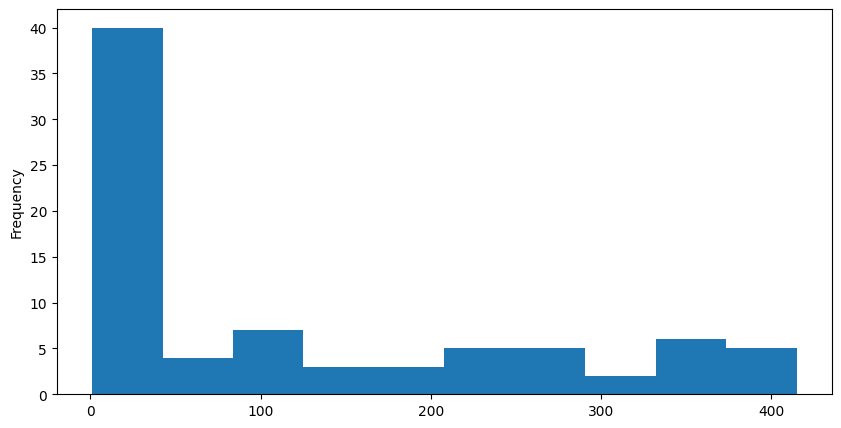

In [ ]:
import matplotlib.pyplot as plt
movies['Rating'].value_counts().plot(kind='hist', figsize=(10,5))
plt.show()

In [ ]:
movies['Rating']=movies['Rating'].fillna(0)

In [ ]:
movies['Rating'].isnull().sum()

0

In [ ]:
movies=movies[['Title','Description','Genre','Director','Cast','Rating','Poster']]

In [ ]:
movies.shape

(10000, 7)

In [ ]:
movies.isnull().sum()

Title           0
Description     0
Genre           7
Director        5
Cast           39
Rating          0
Poster          0
dtype: int64

In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies.shape

(9955, 7)

In [ ]:
movies.sample(3)

,Title,Description,Genre,Director,Cast,Rating,Poster
1760,The Mechanic,An elite hitman teaches his trade to an appren...,"Action, Crime, Thriller",Simon West,"Jason Statham, Ben Foster, Donald Sutherland, ...",6.5,https://m.media-amazon.com/images/M/MV5BMzJhYj...
5234,Ma mère,"When his father dies, a young man is introduce...","Drama, Romance",Christophe Honoré,"Isabelle Huppert, Louis Garrel, Emma de Caunes...",5.0,https://m.media-amazon.com/images/M/MV5BMTU5Mz...
2305,Kiss the Future,Besieged Sarajevans find hope in underground a...,Documentary,Nenad Cicin-Sain,"Christiane Amanpour, Bill Clinton, Muhamed Sac...",7.4,https://m.media-amazon.com/images/M/MV5BNTg4Zj...


In [ ]:
movies['Title']=movies['Title'].apply(getCast)

In [ ]:
movies.head()

,Title,Description,Genre,Director,Cast,Rating,Poster
0,[The Idea of You],"Solène, a 40-year-old single mom, begins an un...","Comedy, Drama, Romance",Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...
1,[Kingdom of the Planet of the Apes],"Many years after the reign of Caesar, a young ...","Action, Adventure, Sci-Fi",Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...
2,[Unfrosted],"In 1963 Michigan, business rivals Kellogg's an...","Biography, Comedy, History",Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",5.5,https://m.media-amazon.com/images/M/MV5BZjIyOT...
3,[The Fall Guy],A down-and-out stuntman must find the missing ...,"Action, Comedy, Drama",David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",7.3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...
4,[Challengers],"Tashi, a former tennis prodigy turned coach, t...","Drama, Romance, Sport",Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",7.7,https://m.media-amazon.com/images/M/MV5BNTk1MT...


In [ ]:
L=[]
s=""
for i in movies['Genre'].iloc[0]:
  if i=="," or i==" ":
    L.append(s)
    s=""
  else:
    s=s+i
L.append(s)


In [ ]:
L

['Comedy', '', 'Drama', '', 'Romance']

In [ ]:
for i in L:
  if i=='':
    L.remove(i)


In [ ]:
L

['Comedy', 'Drama', 'Romance']

In [ ]:
def getVal(text):
  L=[]
  s=""
  for i in text:
    if i=="," or i==" ":
      L.append(s)
      s=""
    else:
      s=s+i
  L.append(s)
  for i in L:
    if i=='':
      L.remove(i)
  return L

In [ ]:
movies['Genre']=movies['Genre'].apply(getVal)

In [ ]:
movies['Director'].iloc[0]

'Michael Showalter'

In [ ]:
L=[]
s=""
for i in movies['Director'].iloc[0]:
  s+=i
L.append(s)

In [ ]:
L

['Michael Showalter']

In [ ]:
movies.sample(3)

,Title,Description,Genre,Director,Cast,Rating,Poster
1277,[Rain Man],After a selfish L.A. yuppie learns his estrang...,[Drama],Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",8.0,https://m.media-amazon.com/images/M/MV5BMzVjNz...
99,[Damsel],A dutiful damsel agrees to marry a handsome pr...,"[Action, Adventure, Fantasy]",Juan Carlos Fresnadillo,"Millie Bobby Brown, Ray Winstone, Angela Basse...",6.1,https://m.media-amazon.com/images/M/MV5BODRiMT...
6303,[Exit to Eden],"Elliot heads for the sexual fantasy island, Ed...","[Comedy, Crime, Romance]",Garry Marshall,"Dana Delany, Dan Aykroyd, Rosie O'Donnell, Pau...",4.2,https://m.media-amazon.com/images/M/MV5BMDliZW...


In [ ]:
def getDirec(text):
  L=[]
  s=""
  for i in text:
    s+=i
  L.append(s)
  return L

In [ ]:
movies['Director']=movies['Director'].apply(getDirec)

In [ ]:
movies['Cast'].iloc[8].split(', ')

['Sydney Sweeney', 'Glen Powell', 'Alexandra Shipp', 'Mia Artemis']

In [ ]:
def getCast(text):
  return text.split(', ')

In [ ]:
movies['Cast']=movies['Cast'].apply(getCast)

In [ ]:
def getOverview(text):
  s=""
  L=[]
  for i in text:
    if i!=" ":
      s+=i
    else:
      L.append(s)
      s=""
  return L

In [ ]:
getOverview(movies['Description'].iloc[0])

['Solène,',
 'a',
 '40-year-old',
 'single',
 'mom,',
 'begins',
 'an',
 'unexpected',
 'romance',
 'with',
 '24-year-old',
 'Hayes',
 'Campbell,',
 'the',
 'lead',
 'singer',
 'of',
 'August',
 'Moon,',
 'the',
 'hottest',
 'boy',
 'band',
 'on',
 'the']

In [ ]:
movies['Description']=movies['Description'].apply(getOverview)

In [ ]:
movies.head()

,Title,Description,Genre,Director,Cast,Rating,Poster
0,[The Idea of You],"[Solène,, a, 40-year-old, single, mom,, begins...","[Comedy, Drama, Romance]",[Michael Showalter],"[Anne Hathaway, Nicholas Galitzine, Ella Rubin...",6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...
1,[Kingdom of the Planet of the Apes],"[Many, years, after, the, reign, of, Caesar,, ...","[Action, Adventure, Sci-Fi]",[Wes Ball],"[Owen Teague, Freya Allan, Kevin Durand, Peter...",7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...
2,[Unfrosted],"[In, 1963, Michigan,, business, rivals, Kellog...","[Biography, Comedy, History]",[Jerry Seinfeld],"[Isaac Bae, Jerry Seinfeld, Chris Rickett, Rac...",5.5,https://m.media-amazon.com/images/M/MV5BZjIyOT...
3,[The Fall Guy],"[A, down-and-out, stuntman, must, find, the, m...","[Action, Comedy, Drama]",[David Leitch],"[Ryan Gosling, Emily Blunt, Aaron Taylor-Johns...",7.3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...
4,[Challengers],"[Tashi,, a, former, tennis, prodigy, turned, c...","[Drama, Romance, Sport]",[Luca Guadagnino],"[Zendaya, Mike Faist, Josh O'Connor, Darnell A...",7.7,https://m.media-amazon.com/images/M/MV5BNTk1MT...


In [ ]:
def collapse(text):
  L=[]
  for i in text:
    L.append(i.replace(" ",""))
  return L

In [ ]:
movies['Genre']=movies['Genre'].apply(collapse)

In [ ]:
movies['Director']=movies['Director'].apply(collapse)

In [ ]:
movies['Cast']=movies['Cast'].apply(collapse)

In [ ]:
movies.head()

,Title,Description,Genre,Director,Cast,Rating,Poster
0,[The Idea of You],"[Solène,, a, 40-year-old, single, mom,, begins...","[Comedy, Drama, Romance]",[MichaelShowalter],"[AnneHathaway, NicholasGalitzine, EllaRubin, A...",6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...
1,[Kingdom of the Planet of the Apes],"[Many, years, after, the, reign, of, Caesar,, ...","[Action, Adventure, Sci-Fi]",[WesBall],"[OwenTeague, FreyaAllan, KevinDurand, PeterMacon]",7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...
2,[Unfrosted],"[In, 1963, Michigan,, business, rivals, Kellog...","[Biography, Comedy, History]",[JerrySeinfeld],"[IsaacBae, JerrySeinfeld, ChrisRickett, Rachae...",5.5,https://m.media-amazon.com/images/M/MV5BZjIyOT...
3,[The Fall Guy],"[A, down-and-out, stuntman, must, find, the, m...","[Action, Comedy, Drama]",[DavidLeitch],"[RyanGosling, EmilyBlunt, AaronTaylor-Johnson,...",7.3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...
4,[Challengers],"[Tashi,, a, former, tennis, prodigy, turned, c...","[Drama, Romance, Sport]",[LucaGuadagnino],"[Zendaya, MikeFaist, JoshO'Connor, DarnellAppl...",7.7,https://m.media-amazon.com/images/M/MV5BNTk1MT...


In [ ]:
movies['tags']=movies['Title']+movies['Description']+movies['Genre']+movies['Director']+movies['Cast']

In [ ]:
movies.head(2)

,Title,Description,Genre,Director,Cast,Rating,Poster,tags
0,[The Idea of You],"[Solène,, a, 40-year-old, single, mom,, begins...","[Comedy, Drama, Romance]",[MichaelShowalter],"[AnneHathaway, NicholasGalitzine, EllaRubin, A...",6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...,"[The Idea of You, Solène,, a, 40-year-old, sin..."
1,[Kingdom of the Planet of the Apes],"[Many, years, after, the, reign, of, Caesar,, ...","[Action, Adventure, Sci-Fi]",[WesBall],"[OwenTeague, FreyaAllan, KevinDurand, PeterMacon]",7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...,"[Kingdom of the Planet of the Apes, Many, year..."


In [ ]:
new=movies.drop(columns=['Description','Genre','Director','Cast'])

In [ ]:
new

,Title,Rating,Poster,tags
0,[The Idea of You],6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...,"[The Idea of You, Solène,, a, 40-year-old, sin..."
1,[Kingdom of the Planet of the Apes],7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...,"[Kingdom of the Planet of the Apes, Many, year..."
2,[Unfrosted],5.5,https://m.media-amazon.com/images/M/MV5BZjIyOT...,"[Unfrosted, In, 1963, Michigan,, business, riv..."
3,[The Fall Guy],7.3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,"[The Fall Guy, A, down-and-out, stuntman, must..."
4,[Challengers],7.7,https://m.media-amazon.com/images/M/MV5BNTk1MT...,"[Challengers, Tashi,, a, former, tennis, prodi..."
...,...,...,...,...
9995,[The Greatest Show on Earth],6.5,https://m.media-amazon.com/images/M/MV5BMzg5MW...,"[The Greatest Show on Earth, The, dramatic, li..."
9996,[Berserk: Ougon Jidai-hen I - Haou no Tamago],7.5,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,"[Berserk: Ougon Jidai-hen I - Haou no Tamago, ..."
9997,[Is-slottet],6.5,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,"[Is-slottet, A, couple, of, twelve-year-old, N..."
9998,[Loving Pablo],6.4,https://m.media-amazon.com/images/M/MV5BMTAwOD...,"[Loving Pablo, A, journalist, strikes, up, a, ..."


In [ ]:
def format(text):
  s=""
  for i in text:
    s+=i+" "
  return s

In [ ]:
new['tags']=new['tags'].apply(format)

In [ ]:

def getTitle(text):
  s=""
  for i in text:
    s+=i
  return s
getTitle(new['Title'].iloc[0])

'The Idea of You'

In [ ]:
new['Title']=new['Title'].apply(getTitle)


,Title,Rating,Poster,tags
0,The Idea of You,6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...,"[The Idea of You, Solène,, a, 40-year-old, sin..."
1,Kingdom of the Planet of the Apes,7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...,"[Kingdom of the Planet of the Apes, Many, year..."
2,Unfrosted,5.5,https://m.media-amazon.com/images/M/MV5BZjIyOT...,"[Unfrosted, In, 1963, Michigan,, business, riv..."
3,The Fall Guy,7.3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,"[The Fall Guy, A, down-and-out, stuntman, must..."
4,Challengers,7.7,https://m.media-amazon.com/images/M/MV5BNTk1MT...,"[Challengers, Tashi,, a, former, tennis, prodi..."
...,...,...,...,...
9995,The Greatest Show on Earth,6.5,https://m.media-amazon.com/images/M/MV5BMzg5MW...,"[The Greatest Show on Earth, The, dramatic, li..."
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,7.5,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,"[Berserk: Ougon Jidai-hen I - Haou no Tamago, ..."
9997,Is-slottet,6.5,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,"[Is-slottet, A, couple, of, twelve-year-old, N..."
9998,Loving Pablo,6.4,https://m.media-amazon.com/images/M/MV5BMTAwOD...,"[Loving Pablo, A, journalist, strikes, up, a, ..."


In [ ]:
new

,Title,Rating,Poster,tags
0,The Idea of You,6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...,"The Idea of You Solène, a 40-year-old single m..."
1,Kingdom of the Planet of the Apes,7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes Many years a...
2,Unfrosted,5.5,https://m.media-amazon.com/images/M/MV5BZjIyOT...,"Unfrosted In 1963 Michigan, business rivals Ke..."
3,The Fall Guy,7.3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy A down-and-out stuntman must find...
4,Challengers,7.7,https://m.media-amazon.com/images/M/MV5BNTk1MT...,"Challengers Tashi, a former tennis prodigy tur..."
...,...,...,...,...
9995,The Greatest Show on Earth,6.5,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth The dramatic lives ...
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,7.5,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago A ...
9997,Is-slottet,6.5,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet A couple of twelve-year-old Norwegi...
9998,Loving Pablo,6.4,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo A journalist strikes up a romanti...


In [ ]:
import nltk

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def grammar(text):
  L=[]
  for i in text.split():
    L.append(ps.stem(i))
  return " ".join(L)

In [ ]:
grammar(new['tags'].iloc[0])

'the idea of you solène, a 40-year-old singl mom, begin an unexpect romanc with 24-year-old hay campbell, the lead singer of august moon, the hottest boy band on the comedi drama romanc michaelshowalt annehathaway nicholasgalitzin ellarubin anniemumolo'

In [ ]:
new['tags']=new['tags'].apply(grammar)

In [ ]:
new.head(2)

,Title,Rating,Poster,tags
0,The Idea of You,6.4,https://m.media-amazon.com/images/M/MV5BYWRkZj...,"the idea of you solène, a 40-year-old singl mo..."
1,Kingdom of the Planet of the Apes,7.3,https://m.media-amazon.com/images/M/MV5BZGI4NT...,kingdom of the planet of the ape mani year aft...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
vectors=cv.fit_transform(new['tags']).toarray()

In [ ]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [ ]:
similarity

array([[1.        , 0.09697623, 0.05598925, ..., 0.30949223, 0.04962917,
        0.13130643],
       [0.09697623, 1.        , 0.        , ..., 0.05802589, 0.        ,
        0.0410305 ],
       [0.05598925, 0.        , 1.        , ..., 0.        , 0.0805823 ,
        0.        ],
       ...,
       [0.30949223, 0.05802589, 0.        , ..., 1.        , 0.17817416,
        0.15713484],
       [0.04962917, 0.        , 0.0805823 , ..., 0.17817416, 1.        ,
        0.18898224],
       [0.13130643, 0.0410305 , 0.        , ..., 0.15713484, 0.18898224,
        1.        ]])

In [ ]:
def recommend(movie):
  movie_index=new[new['Title']==movie].index[0]
  distances=similarity
  movies_list=sorted(list(enumerate(distances[movie_index])),reverse=True,key=lambda x:x[1])[1:11]
  for i in movies_list:
    print(new.iloc[i[0]].Title)


In [ ]:
recommend('August')

Messiah of Evil
Lord of Misrule
The Wicker Man
The Forest
Into the Deep
Nosferatu
The Grudge 2
Zombie Strippers!
I Know Who Killed Me
Cargo


In [ ]:
import pickle

In [ ]:
pickle.dump(new, open('movies_list.pkl','wb'))

In [ ]:
pickle.dump(similarity, open('similarity_matrix.pkl', 'wb'))

In [ ]:
rated_movie=sorted(list(enumerate(new['Rating'])),reverse=True,key=lambda x:x[1])[0:51]

In [ ]:
for i in rated_movie:
  print(new.iloc[i[0]].Title, i[1], i[0])


August 9.7 6384
Just Now Jeffrey 9.5 8993
Los Frikis 9.5 9373
The Shawshank Redemption 9.3 71
The Godfather 9.2 55
Men Are from QCWomen Are from Alabang 9.1 8667
The Dark Knight 9.0 106
The Lord of the Rings: The Return of the King 9.0 116
Schindler's List 9.0 125
12 Angry Men 9.0 327
The Godfather Part II 9.0 358
Sweetland 9.0 8299
The Lord of the Rings: The Fellowship of the Ring 8.9 89
Pulp Fiction 8.9 103
12th Fail 8.9 157
O2 8.9 2075
O.J.: Made in America 8.9 2875
Inception 8.8 105
Forrest Gump 8.8 130
Fight Club 8.8 160
The Lord of the Rings: The Two Towers 8.8 195
Il buonoil bruttoil cattivo 8.8 527
Ghostlight 8.8 3490
Magpie 8.8 4799
Shayar 8.8 5772
Dune: Part Two 8.7 10
Interstellar 8.7 77
The Matrix 8.7 129
Star Wars: Episode V - The Empire Strikes Back 8.7 182
Goodfellas 8.7 239
One Flew Over the Cuckoo's Nest 8.7 499
Stop Making Sense 8.7 1575
Jai Bhim 8.7 3176
Kill Bill: The Whole Bloody Affair 8.7 4966
Katie's Mom 8.7 7439
777 Charlie 8.7 9305
Shoah 8.7 9346
Star Wars 8.6

In [ ]:
new.iloc[6384,]

Title                                                August
Rating                                                  9.7
Poster    https://m.media-amazon.com/images/M/MV5BOGMyZT...
tags      august the documentari mark the directori debu...
Name: 6401, dtype: object